<a href="https://colab.research.google.com/github/henryd87/Full-Stack-Website/blob/main/Insurance_Costs_combined_Linear_Regression_and_kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #makes plots and graphs
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
insurance_data = pd.read_csv("insurance.csv")
insurance_data
#target values is the charge assigned per person

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
insurance_data.shape

(1338, 7)

In [ ]:
insurance_data.info()
#we have a problem with object data types,
#they need to be changed into numerical values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
n=insurance_data.select_dtypes(include="object")
n
#finds all independent variables that have object dtypes
# and need to be changed!

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


In [ ]:
insurance_data.isnull().sum()
#return the sum of all null instances in each column.


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
insurance_data.describe()
#25% of values are less than the age of 27

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<ipython-input-222-978157882b35>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_data['age'])


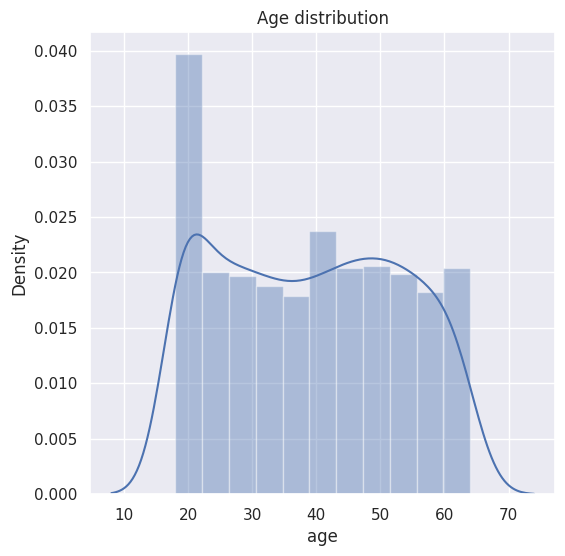

In [ ]:
#distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_data['age'])
plt.title("Age distribution")
plt.show()

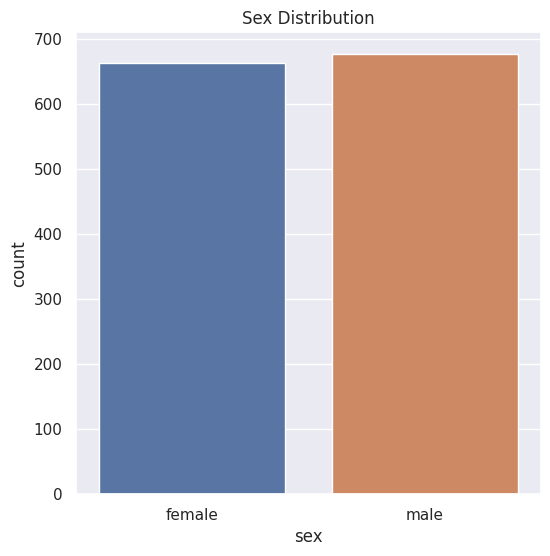

In [ ]:
#gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=insurance_data)
plt.title('Sex Distribution')
plt.show()

In [ ]:
insurance_data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

<ipython-input-225-d0241e9ca084>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_data['bmi'])


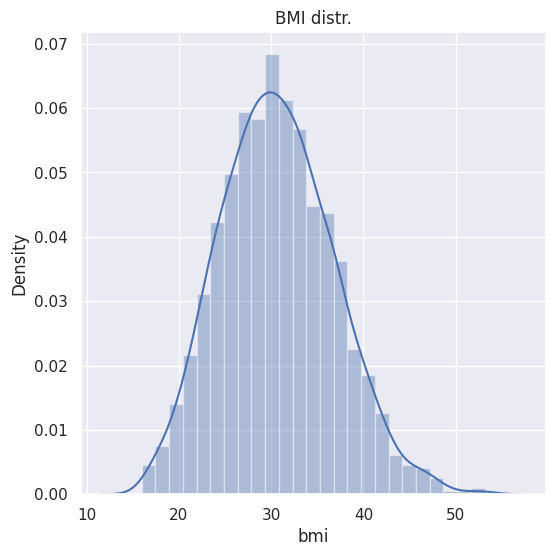

In [ ]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_data['bmi'])
plt.title("BMI distr.")
plt.show()

In [ ]:
insurance_data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

Normal BMI range --> 18.5 to 24.9

In [ ]:
insurance_data.replace({'sex':{'male':0,'female':1}},inplace=True)
insurance_data.replace({'smoker':{'yes':0,'no':1}},inplace=True)
insurance_data.replace({'region':{'southwest':1,'southeast':0,
                                  'northwest':3,'northeast':2}},inplace=True)
#one hot encoding prime example
insurance_data


,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


In [ ]:
X=insurance_data.drop(columns="charges",axis=1) #creating ind. variables.
Y=insurance_data["charges"] #creating dep. variables
#0 represents row, 1 represents column

In [ ]:
X

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3
1334,18,1,31.920,0,1,2
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [ ]:
#splitting data into training and testing data

In [ ]:
X_train, X_test, Y_train,Y_test=train_test_split(X,Y,test_size=.2,random_state=2)
#random_state is for cretaing the same split for every execution

In [ ]:
X.shape, X_train.shape,X_test.shape

((1338, 6), (1070, 6), (268, 6))

In [ ]:
regressor=LinearRegression()


In [ ]:
regressor.fit(X_train,Y_train)

LinearRegression()

In [ ]:
training_data_prediction=regressor.predict(X_train)

In [ ]:
#Finding R squared, 0-1,
r2_train=metrics.r2_score(Y_train,training_data_prediction)
r2_train

0.751505643411174

In [ ]:
testing_data_prediction=regressor.predict(X_test)
r2_test=metrics.r2_score(Y_test,testing_data_prediction)
r2_test

0.7447273869684076

In [ ]:
input_data=(31,0,25.74,0,1,0)
idarr=np.asarray(input_data)
idre=idarr.reshape(1,-1)
prediction=regressor.predict(idre)
prediction

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3733.96341684])

**HEAT MAP**

<Axes: >

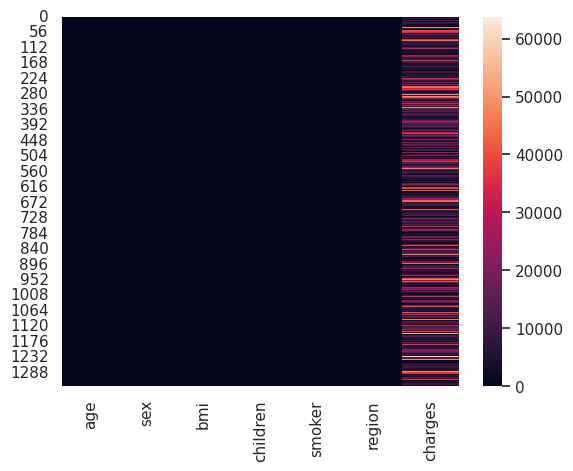

In [ ]:


#use regular insurance_data
sns.heatmap(insurance_data)

<Axes: >

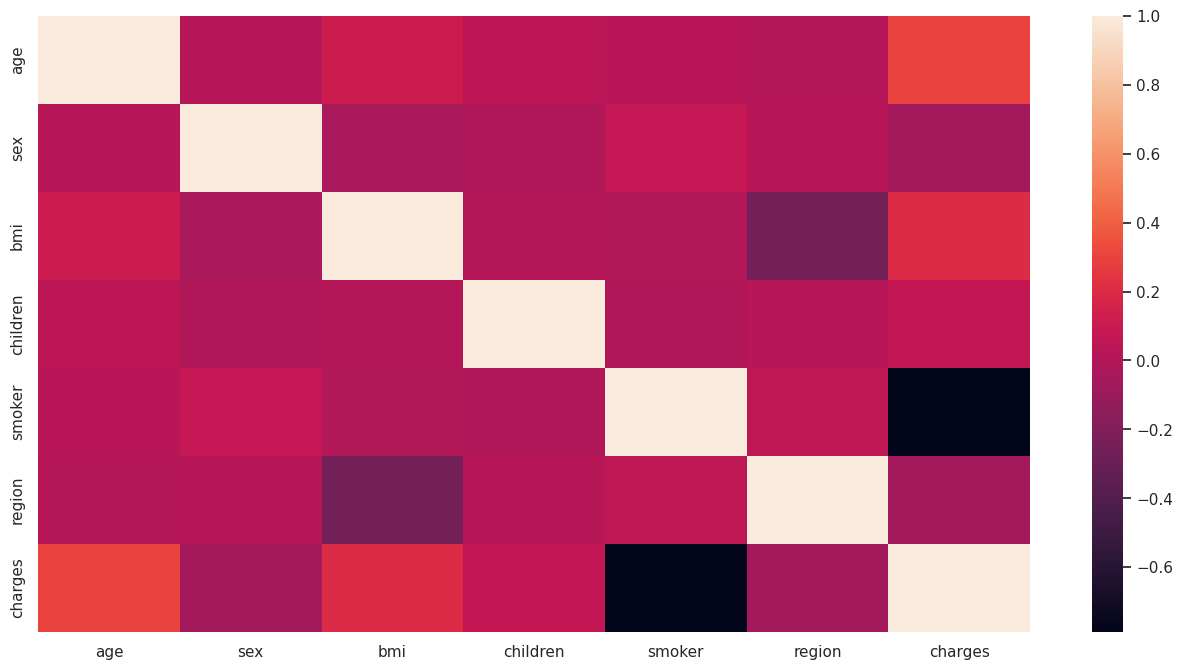

In [ ]:
cor=insurance_data.corr()
plt.figure(figsize=(16,8))
sns.heatmap(cor)

**kNN Phase**

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=1)
Y_train
n=insurance_data['charges'].median()
n
sum=0
insurance_data
#insurance_Data['charges']=insurance_data['charges'].replace(x,if x<9382: return 0 e)
#for value in insurance_data['charges']:
  #print(insurance_data['charges'][value])
  #if insurance_data['charges'][value]<9382:
    #insurance_data['charges']=insurance_data['charges'].replace(insurance_data['charges'].values,0)
  #else:
    #insurance_data['charges']=insurance_data['charges'].replace(insurance_data['charges'].values,1)


,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500
